# Project: Analysis of Players Stats in the Premier League (2018-2019)

![cover](https://wallpapersafari.com/download/vxnqet/)

## Table of Contents


- [Introduction](#intro)
- [Download and Load Dataset](#load)
- [Data Assessment](#assess)
- [Issues to be Addressed](#address)
- [Data Cleaning](#clean)
- [Exploratory Analysis and Visualization](#explore)
- [Inferences and Conclusion](#conclusion)
- [Simple Dashboard](#dashboard)

<a id='intro'></a>

## 1. Introduction

> Thus far I have reached this milestone in the [Data-Analysis with Python: Zero to Pandas](zerotopandas.com) course. This notebook is the final project required to be completed before earning a certificate of accomplishment. 
>
> The data source. This data used for this project was downloaded from [footystats](footystats.org). This particular data is the free sample data provided by footystats and can be downloaded [here](https://footystats.org/c-dl.php?type=players&comp=1625).
>
> The data. The dataset contains the basic statistics of football players in the 2018/2019 English Premier League session. Some of these statistics include number of goals and assists, overall minutes played, number of yellow and red cards etc. The objective of this project is to demonstrate the understanding of the data analysis process which include data gathering, exploration, cleaning, visualization etc. 

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os

<a id='load'></a>

## 2. Download and Load Dataset

In [49]:
url = 'https://footystats.org/c-dl.php?type=players&comp=1625'
response = requests.get(url)

with open(os.path.join('england-premier-league-players-2018-to-2019-stats.csv'), mode='wb') as file:
    file.write(response.content)

In [50]:
football_stats_df = pd.read_csv('england-premier-league-players-2018-to-2019-stats.csv')

<a id='assess'></a>

## 3. Data Assessment

Here, we access our data both programmatically and virtually for any missing value, duplicates, inconsistent values and so on.   
**Note:   
Semicolons are added to suppress large output of some cells   
Remove semicolon to show output**

In [51]:
football_stats_df.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,34,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,31,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,31,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,21,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31


In [52]:
football_stats_df.columns;

In [53]:
football_stats_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   full_name                       570 non-null    object 
 1   age                             570 non-null    int64  
 2   birthday                        570 non-null    int64  
 3   birthday_GMT                    570 non-null    object 
 4   league                          570 non-null    object 
 5   season                          570 non-null    object 
 6   position                        570 non-null    object 
 7   Current Club                    570 non-null    object 
 8   minutes_played_overall          570 non-null    int64  
 9   minutes_played_home             570 non-null    int64  
 10  minutes_played_away             570 non-null    int64  
 11  nationality                     570 non-null    object 
 12  appearances_overall             570 

In [54]:
football_stats_df.describe()

,age,birthday,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
count,570.000000,5.700000e+02,570.000000,570.00000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,28.952632,7.123348e+08,1317.577193,658.95614,658.621053,18.380702,9.184211,9.196491,1.824561,1.008772,...,1.210386,63.638596,56.487719,475.163158,464.422807,0.140263,154.103509,154.103509,26.324561,11.277193
std,4.359851,1.380632e+08,1096.272614,557.48134,549.122038,12.863375,6.525286,6.491307,3.478899,2.151942,...,0.952720,48.089868,30.684299,610.579856,733.732082,0.232726,139.492697,139.492697,49.730291,8.456464
min,20.000000,2.958336e+08,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,26.000000,6.190992e+08,212.250000,90.00000,102.000000,6.000000,3.000000,3.000000,0.000000,0.000000,...,0.682500,40.000000,35.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,4.000000
50%,29.000000,7.074432e+08,1115.500000,540.00000,565.000000,19.000000,10.000000,9.500000,0.000000,0.000000,...,1.210000,63.000000,67.000000,332.000000,0.000000,0.100000,134.500000,134.500000,-1.000000,11.000000
75%,32.000000,8.168040e+08,2185.500000,1126.75000,1121.500000,30.000000,15.000000,15.000000,2.000000,1.000000,...,1.580000,80.000000,83.000000,676.250000,682.500000,0.200000,276.750000,276.750000,32.750000,18.000000
max,42.000000,1.001894e+09,3420.000000,1710.00000,1710.000000,38.000000,19.000000,19.000000,22.000000,18.000000,...,8.570000,353.000000,90.000000,3420.000000,3420.000000,4.090000,419.000000,419.000000,175.000000,31.000000


In [55]:
sum(football_stats_df.full_name.str.islower())

0

In [56]:
football_stats_df.position.unique()

array(['Defender', 'Midfielder', 'Forward', 'Goalkeeper'], dtype=object)

In [57]:
teams = football_stats_df['Current Club'].unique()
teams

array(['West Ham United', 'Burnley', 'Huddersfield Town', 'Arsenal',
       'Crystal Palace', 'Watford', 'Fulham', 'Liverpool',
       'AFC Bournemouth', 'Wolverhampton Wanderers', 'Everton',
       'Leicester City', 'Southampton', 'Cardiff City',
       'Manchester United', 'Tottenham Hotspur', 'Brighton & Hove Albion',
       'Chelsea', 'Newcastle United', 'Manchester City'], dtype=object)

In [58]:
len(teams)

20

In [59]:
country = football_stats_df['nationality'].unique()
country;

In [60]:
len(country)

67

<a id='address'></a>

## 4. Issues to be addressed

The following are the issues detected from the programmatic and visual assessment of the data. These issues will be addressed in the next section, 'Data Cleaning', before analysis is done.

>- inconsistent column header names (```Current Club```)
>- multiple values in a single column (```birthday_GMT```)
>- drop irrelevant columns
>- add new column

<a id='clean'></a>

## 5. Data Cleaning

All data quality issues detected in the previous section are cleaned

In [61]:
football_stats_df_clean = football_stats_df.copy() 

### 4.1 inconsistent column header names

Change ```Current Club``` to lowercase characters. Also, use underscore where appropriate

In [62]:
football_stats_df_clean.rename(columns={'Current Club': 'current_club'}, inplace=True)

In [63]:
football_stats_df_clean.head(1)

,full_name,age,birthday,birthday_GMT,league,season,position,current_club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20


### 4.2 multiple values in a single column (```birthday_GMT```)

Extract birthday year, month, and day into a new column

In [64]:
football_stats_df_clean[['birth_year', 'birth_month', 'birth_date']] = (
football_stats_df_clean['birthday_GMT'].str.split('/', expand=True)
)

In [65]:
football_stats_df_clean.head(3)

,full_name,age,birthday,birthday_GMT,league,season,position,current_club,minutes_played_overall,minutes_played_home,...,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birth_year,birth_month,birth_date
0,Aaron Cresswell,32,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1589,1589,0.06,290,191,80,20,1989,12,15
1,Aaron Lennon,34,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1217,1217,0.07,196,187,-1,10,1987,04,16
2,Aaron Mooy,31,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,582,2327,0.15,144,233,-1,3,1990,09,15


### 4.3 drop ```birthday``` column

The ```birthday``` column is not relevant to our analysis. Hence, we drop it

In [66]:
football_stats_df_clean.drop('birthday', axis=1, inplace=True)

In [67]:
football_stats_df_clean.head(2)

,full_name,age,birthday_GMT,league,season,position,current_club,minutes_played_overall,minutes_played_home,minutes_played_away,...,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birth_year,birth_month,birth_date
0,Aaron Cresswell,32,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,701,...,1589,1589,0.06,290,191,80,20,1989,12,15
1,Aaron Lennon,34,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,...,1217,1217,0.07,196,187,-1,10,1987,04,16


### 4.4 add new column

We might want to analyze the number of players from different continents playing in the premier league (2018/2019). To do this, we need to add another column which will contain the corresponding continent of each player's country. The data to be used is gotten from a Github repository. Also, this file is available in this project repository.    
Before, we merge merge both dataframes however, we first need to check for countries with missing continents in our file. This countries, if any exist, are added manually.

In [68]:
continents = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')

In [69]:
continents.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [70]:
# rename column headers
continents.rename(columns={'Country': 'nationality', 'Continent': 'continent'}, inplace=True)

In [71]:
nationality_football = football_stats_df.nationality
nationality_football;

In [72]:
nationality_continents = continents.nationality
nationality_continents;

In [73]:
missing = nationality_football[~nationality_football.isin(nationality_continents)].unique()
missing

array(['England', 'Wales', 'Scotland', 'Republic of Ireland',
       'Northern Ireland', 'USA', 'Congo DR', "Côte d'Ivoire",
       'South Korea', 'Curaçao', 'Czech Republic'], dtype=object)

In [74]:
additional_continents = {'England': 'Europe', 'Wales': 'Europe', 'Scotland': 'Europe', 
                         'Republic of Ireland': 'Europe', 'Northern Ireland': 'Europe',
                         'USA': 'North America', 'Congo DR': 'Africa', 
                         "Côte d'Ivoire": 'Africa', 'South Korea': 'Asia',
                         'Curaçao': 'South America', 'Czech Republic': 'Europe'
                        }

In [75]:
# convert additional_contents to dataframe
additional_continents_df = pd.DataFrame(additional_continents.items(), columns=['nationality', 'continent'])
additional_continents_df

,nationality,continent
0,England,Europe
1,Wales,Europe
2,Scotland,Europe
3,Republic of Ireland,Europe
4,Northern Ireland,Europe
5,USA,North America
6,Congo DR,Africa
7,Côte d'Ivoire,Africa
8,South Korea,Asia
9,Curaçao,South America


In [76]:
# append 'additional_continents_df' to 'continents'
continents = continents.append(additional_continents_df)
continents;

In [77]:
football_stats_df_clean = football_stats_df_clean.merge(continents)
football_stats_df_clean[['nationality', 'continent']].head()

,nationality,continent
0,England,Europe
1,England,Europe
2,England,Europe
3,England,Europe
4,England,Europe


In [78]:
# check if everything worked fine
football_stats_df.shape[0] == football_stats_df_clean.shape[0]

True

In [79]:
continents.to_csv('countries_continents.csv', index=False)

<a id='explore'></a>

## 6. Exploratory Analysis and Visualization

This section combines "asking questions", "exploration" and "visualization".   
**Note: All questions asked and answered were in-line with player data in the 2018/2019 premier league season and should not be considered 'valid' for any other seasons.**

In [80]:
# configure visualization workspace
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Q1: How many Africans play in the 2018/2019 Premier League

<img src="https://thumbs.dreamstime.com/z/soccer-ball-planet-earth-globe-concept-isolated-white-background-football-realistic-continents-d-render-illustration-maps-129474444.jpg" width="200" height="1000">

continent
Africa            44
Asia              10
Europe           453
North America     10
Oceania            3
South America     50
Name: nationality, dtype: int64

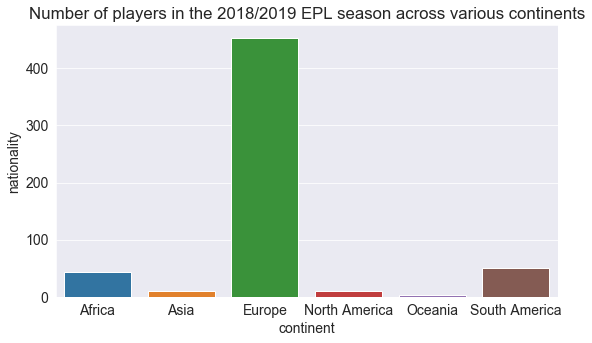

In [81]:
continents_data = football_stats_df_clean.groupby('continent').count()['nationality']
display(continents_data)
sns.barplot(continents_data.index, continents_data)
plt.title('Number of players in the 2018/2019 EPL season across various continents');

In [82]:
continents_data.values

array([ 44,  10, 453,  10,   3,  50], dtype=int64)

###  Q2: List the top 5 Midfielders with the highest number of assists 

<img src="https://staticr1.blastingcdn.com/media/photogallery/2019/1/13/os/b_1200x630/christian-eriksen-et-eden-hazard-bientot-coequipiers-au-real-madrid-flipboardcom_2181373.jpg" width="800" height="200">

,full_name,position,assists_overall,current_club
457,Eden Hazard,Midfielder,15,Chelsea
393,Ryan Fraser,Midfielder,14,AFC Bournemouth
378,Christian Eriksen,Midfielder,12,Tottenham Hotspur
368,Leroy Sané,Midfielder,10,Manchester City
255,Paul Pogba,Midfielder,9,Manchester United


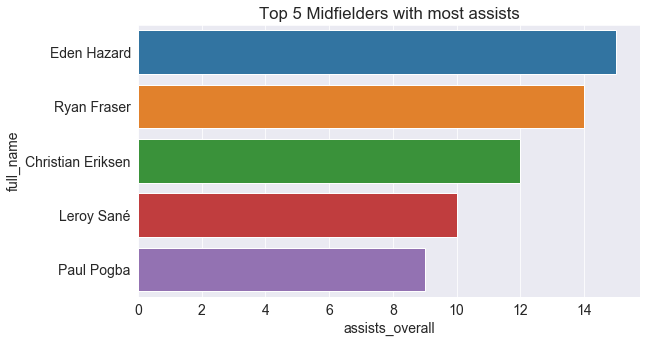

In [83]:
top_assists_midfielders = (football_stats_df_clean.query('position == "Midfielder"')
                           .sort_values(by ='assists_overall', ascending=False)
                          [['full_name', 'position', 'assists_overall', 'current_club']]
                          .head(5))
display(top_assists_midfielders)
sns.barplot('assists_overall', 'full_name', data=top_assists_midfielders)
plt.title('Top 5 Midfielders with most assists');

### Q3: Top 5 Africa players with the highest number of goals

<img src="https://images3.alphacoders.com/978/thumb-1920-978738.jpg" width="800" height="200">

,full_name,position,goals_overall,current_club
447,Sadio Mané,Forward,22,Liverpool
561,Mohamed Salah,Forward,22,Liverpool
434,Pierre-Emerick Aubameyang,Forward,22,Arsenal
529,Wilfried Zaha,Midfielder,10,Crystal Palace
567,Riyad Mahrez,Midfielder,7,Manchester City


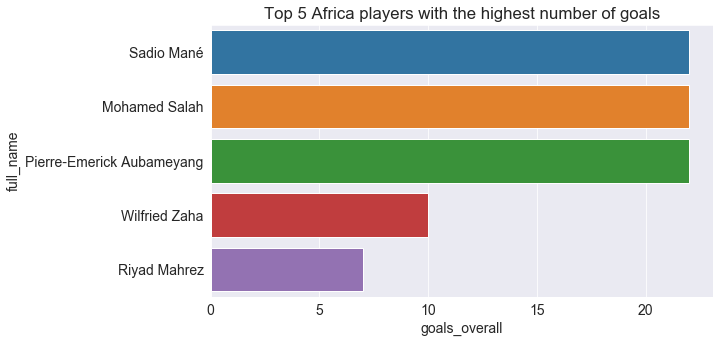

In [84]:
africa_top_scorers = (football_stats_df_clean.query('continent == "Africa"')
                      .sort_values(by='goals_overall', ascending=False)
                      [['full_name', 'position', 'goals_overall', 'current_club']]
                      .head(5)
                     )
display(africa_top_scorers)
sns.barplot('goals_overall', 'full_name', data=africa_top_scorers)
plt.title('Top 5 Africa players with the highest number of goals');

<a id='scatter1'></a>

### Q4: What is the distribution of minutes played to number of yellow cards?

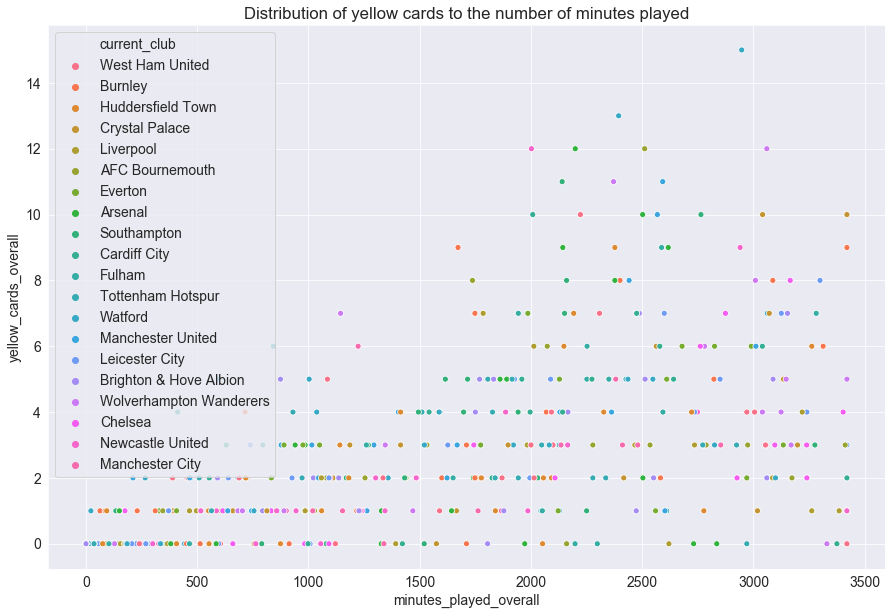

In [96]:
sns.scatterplot(data=football_stats_df_clean, x='minutes_played_overall', y='yellow_cards_overall', hue='current_club')
matplotlib.rcParams['figure.figsize'] = (10, 10)
plt.title('Distribution of yellow cards to the number of minutes played');

### Q5: Which team has the most 'aggressive'  defenders (yellow cards)?

<img src="https://image.assets.pressassociation.io/v2/image/production/0f4a8ff8e7c34e287fe305b306b5ec7aY29udGVudHNlYXJjaCwxNTU3ODQ4OTA0/2.39621273.jpg?w=640" width="800" height="100">

,full_name,position,yellow_cards_overall,current_club
545,José Holebas,Defender,13,Watford
532,Fabian Schär,Defender,12,Newcastle United
547,Sokratis Papastathopoulos,Defender,12,Arsenal
183,Ryan Bennett,Defender,12,Wolverhampton Wanderers
146,Luke Shaw,Defender,11,Manchester United


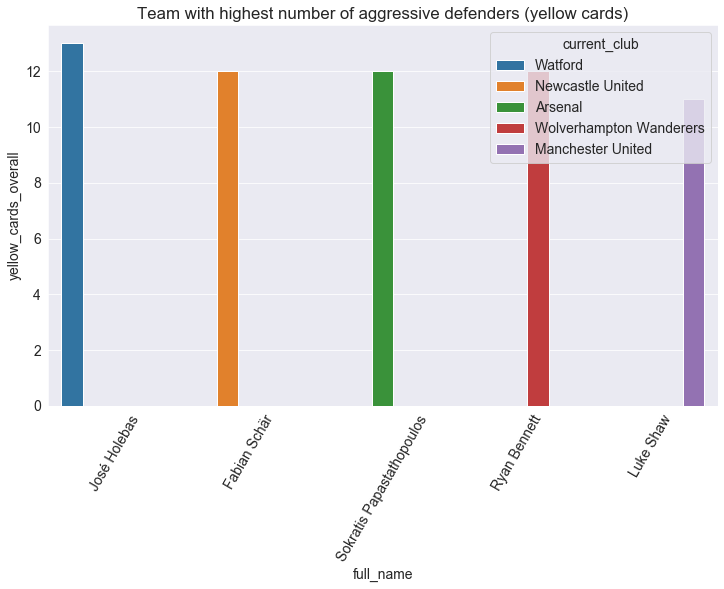

In [86]:
aggressive_defenders_yellow = (football_stats_df_clean.query('position == "Defender"')
                       .sort_values(by='yellow_cards_overall', ascending=False)
                      [['full_name', 'position', 'yellow_cards_overall', 'current_club']]
                      .head(5))
display(aggressive_defenders_yellow)
matplotlib.rcParams['figure.figsize'] = (12, 7)
plot = sns.barplot('full_name', 'yellow_cards_overall', data=aggressive_defenders_yellow, hue='current_club')
plt.title('Team with highest number of aggressive defenders (yellow cards)')
plot.set_xticklabels(labels=list(aggressive_defenders_yellow.full_name), rotation=60);

### Q6: Highest scoring attackers from different continents

<img src="https://images.alphacoders.com/965/965462.jpg" width="800" height="3">

In [87]:
# show indices of top attackers
(football_stats_df_clean
 .sort_values(by='goals_overall', ascending=False)
 .groupby('continent').groups
);

,full_name,position,goals_overall,current_club,continent
561,Mohamed Salah,Forward,22,Liverpool,Africa
540,Heung-Min Son,Forward,12,Tottenham Hotspur,Asia
98,Jamie Vardy,Forward,18,Leicester City,Europe
543,Raúl Alonso Jiménez Rodríguez,Forward,13,Wolverhampton Wanderers,North America
448,Chris Wood,Forward,10,Burnley,Oceania
493,Sergio Aguero,Forward,21,Manchester City,South America


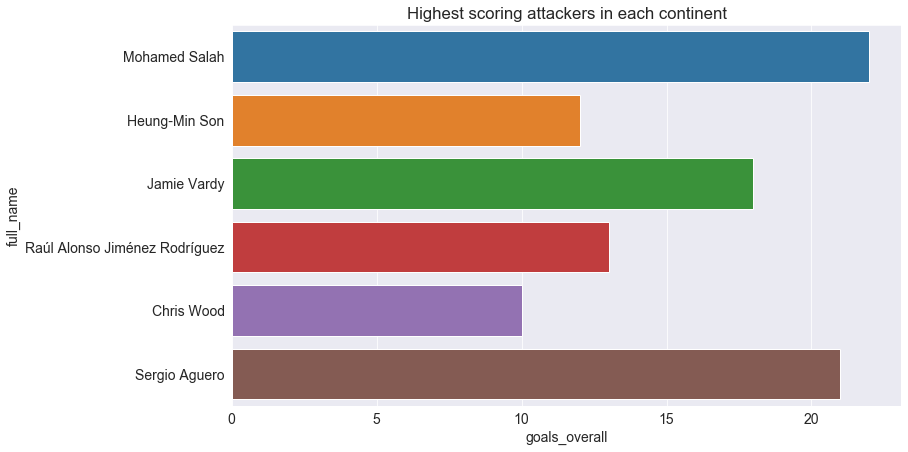

In [88]:
top_attackers_continents = football_stats_df_clean.iloc[[561, 540, 98, 543, 448, 493]][['full_name', 'position', 'goals_overall', 'current_club', 'continent']]
display(top_attackers_continents)
sns.barplot('goals_overall', 'full_name', data=top_attackers_continents)
plt.title('Highest scoring attackers in each continent');

### Q7: Players with highest number of minutes played in each continent

<img src="https://e0.365dm.com/17/06/1600x900/skysports-bruno-ecuele-manga-bruno-manga_3988271.jpg?20170627165005" width="800" height="3">

In [89]:
# show indices of top attackers
(football_stats_df_clean
 .sort_values(by='minutes_played_overall', ascending=False)
 .groupby('continent').groups
);

,full_name,position,current_club,continent,appearances_overall,minutes_played_home
432,Bruno Écuélé Manga,Defender,Cardiff City,Africa,38,1710
564,Neil Leonard Dula Etheridge,Goalkeeper,Cardiff City,Asia,38,1710
30,Ben Mee,Defender,Burnley,Europe,38,1710
543,Raúl Alonso Jiménez Rodríguez,Forward,Wolverhampton Wanderers,North America,38,1648
216,Mathew Ryan,Goalkeeper,Brighton & Hove Albion,Oceania,34,1530
347,Ederson,Goalkeeper,Manchester City,South America,38,1710


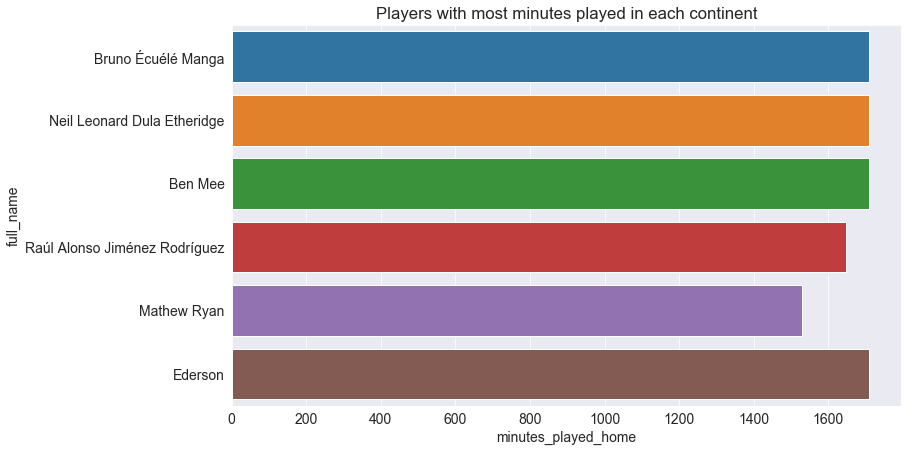

In [90]:
highest_minutes_played_continents = (football_stats_df_clean.iloc[[432, 564, 30, 543, 216, 347]]
 [['full_name', 'position', 'current_club', 'continent', 'appearances_overall', 'minutes_played_home']]
)
display(highest_minutes_played_continents)
sns.barplot('minutes_played_home', 'full_name', data=highest_minutes_played_continents)
plt.title('Players with most minutes played in each continent');

### Q8: Goalkeepers with highest number of cleansheet

<img src="https://wallpapercave.com/wp/wp4332702.jpg" width="800" height="3">

,full_name,position,current_club,clean_sheets_overall
341,Alisson Becker,Goalkeeper,Liverpool,21
347,Ederson,Goalkeeper,Manchester City,20
292,Kepa Arrizabalaga,Goalkeeper,Chelsea,14
118,Jordan Pickford,Goalkeeper,Everton,14
240,Hugo Lloris,Goalkeeper,Tottenham Hotspur,12


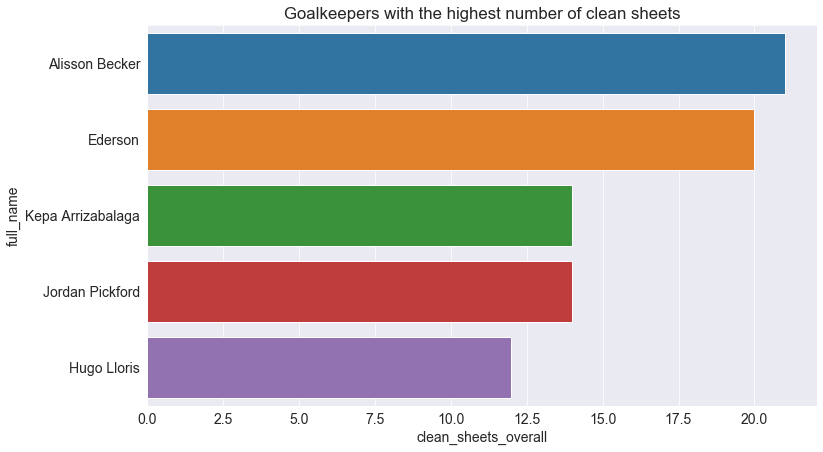

In [91]:
goalkeepers_cleansheet = (football_stats_df_clean.query('position == "Goalkeeper"')
                          .sort_values(by='clean_sheets_overall', ascending=False)
                         [['full_name', 'position', 'current_club', 'clean_sheets_overall']]
                          .head(5)
                         )
display(goalkeepers_cleansheet)
sns.barplot('clean_sheets_overall', 'full_name', data=goalkeepers_cleansheet)
plt.title('Goalkeepers with the highest number of clean sheets');

### Q9: What is distribution of midfielders home to away assist?

<img src="https://images3.alphacoders.com/980/thumb-1920-980476.jpg" width="800" height="3">

<a id='scatter2'></a>

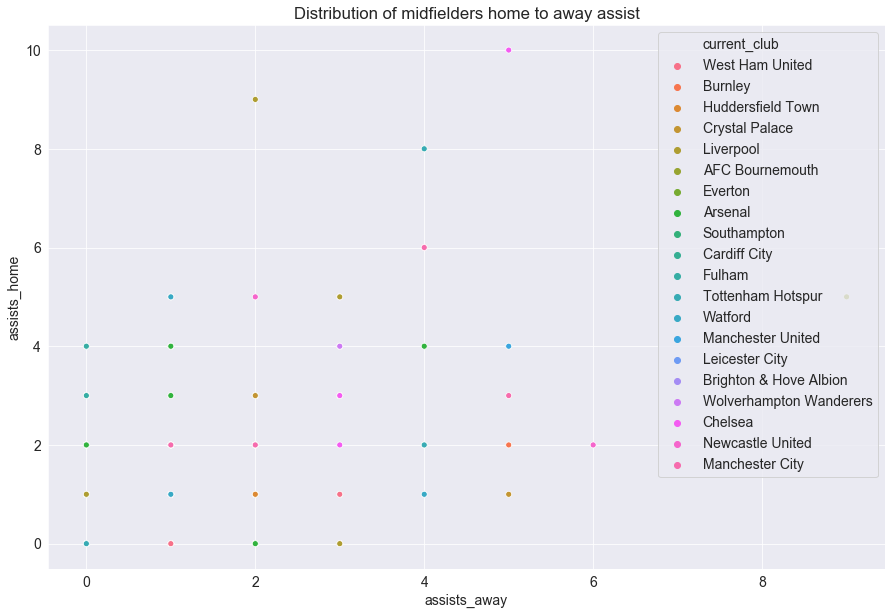

In [95]:
sns.scatterplot(data=football_stats_df_clean, x='assists_away', y='assists_home', hue='current_club')
matplotlib.rcParams['figure.figsize'] = (15, 10)
plt.title('Distribution of midfielders home to away assist');

### Q10: What is distribution of attackers home to away goals?

<img src="https://www.teahub.io/photos/full/335-3352739_sergio-aguero-wallpaper-sergio-kun-aguero.jpg" width="800" height="3">

<a id='scatter3'></a>

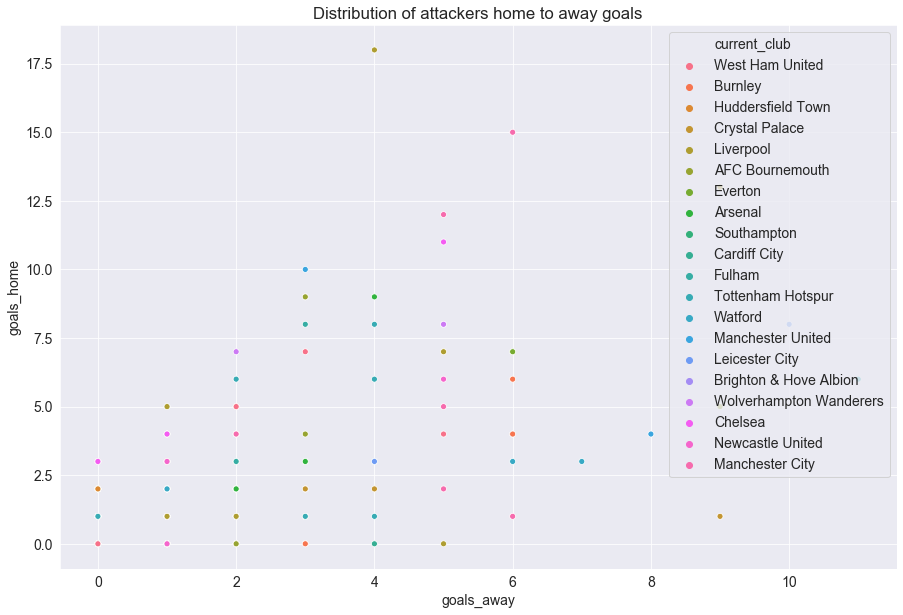

In [93]:
sns.scatterplot(data=football_stats_df_clean, x='goals_away', y='goals_home', hue='current_club')
matplotlib.rcParams['figure.figsize'] = (15, 10)
plt.title('Distribution of attackers home to away goals');

<a id='conclusion'></a>

## 7. Inferences and Conclusion


**Using simple Exploratory Data Analysis and Visualization, we were able to answer the following questions:**
- The number of Africans playing in the 2018/2019 English Premier League is 44, Europe 453, North America 10 etc.
- Eden Hazard is the midfielder with the highest number of assists, 15.
- Sadio Mané, Mohamed Salah and Pierre-Emerick Aubameyang are top scorers from Africa.
- José Holebas has the highest number of yellow cards,	13.	
- The top scoring attacker from Europe is Jamie Vardy, Heung-Min Son from Asia, Sergio Aguero from South America, Mohamed Salah and Sadio Mané from Africa, and so on.
- Bruno Écuélé Manga from Africa, Neil Leonard Dula Etheridge from Asia, and Ben Mee from Europe have the highest number of minutes played with each of them having played a total of 1710 minutes across 38 matches.
- Alisson Becker kept the highest number of clean sheets. 	

**Inferences:**
- In the first [scatterplot](#scatter1), **Distribution of minutes played to number of yellow cards**, the top right corner represents player with high number of minutes played and high number of yellow cards, the top left corners show players with few minutes played but received many yellow cards and so.
- In the second [scatterplot](#scatter2), **Distribution of midfielders home to away assist**, the top right corner shows exceptional midfielders with both high number of home and away assist, the bottom left corner however shows midfielders with only high number of home assist but low number of away assist and so on.
- Similar to the above inferences, the third [scatterplot](#scatter3), **Distribution of attackers home to away goals**, the top right corner shows exceptional attackers with both high number of home and away goals, the bottom left corner however shows attackers with only high number of home goals but low number of away goals and so on.

**Conclusion:**  
This notebook obviously does not provide exhaustive analysis. An interesting motivation would be to delve deeper by answering more questions and use this dataset to predict the performance of players in subsequent seasons  

<a id='dashboard'></a>

### 8. Simple Dashboard

Finally, we create a simple dashboard with few of the charts we drew in the [Exploratory Data Analysis and Visualization](#explore) section.

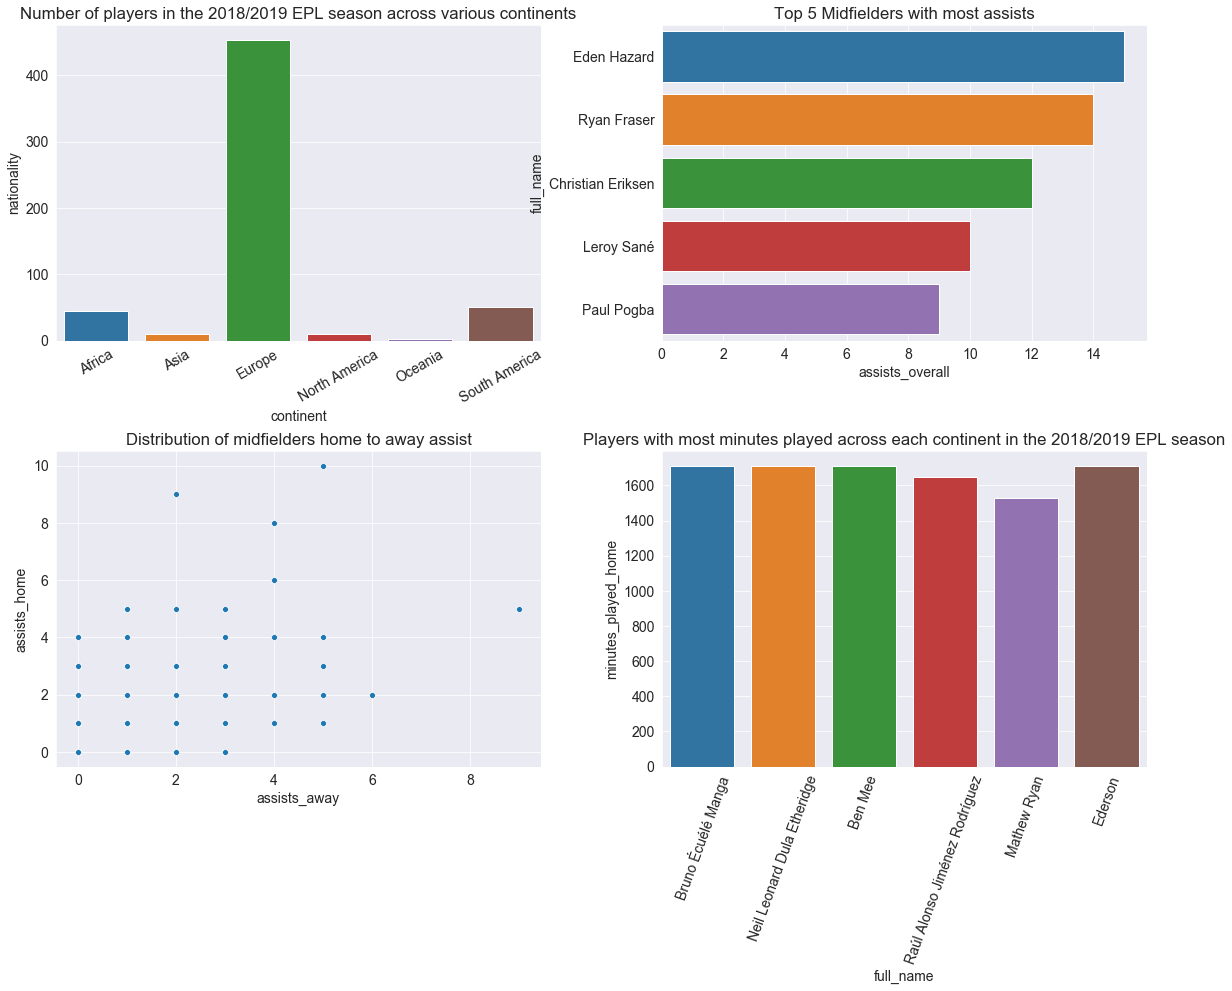

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(18, 13))
plt.tight_layout(6)

axes[0, 0].set_title('Number of players in the 2018/2019 EPL season across various continents')
sns.barplot(continents_data.index, continents_data, ax=axes[0,0])
axes[0, 0].set_xticklabels(labels=list(continents_data.index), rotation=30)

sns.barplot('assists_overall', 'full_name', data=top_assists_midfielders, ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Midfielders with most assists')

sns.scatterplot(data=football_stats_df_clean, x='assists_away', y='assists_home', ax=axes[1,0])
axes[1, 0].set_title('Distribution of midfielders home to away assist')

sns.barplot('full_name', 'minutes_played_home', data=highest_minutes_played_continents, ax=axes[1,1])
axes[1, 1].set_xticklabels(labels=list(highest_minutes_played_continents.full_name), rotation=70)
axes[1, 1].set_title('Players with most minutes played across each continent in the 2018/2019 EPL season');